# Introduction

Here is code to run swarmalators -- have fun! (Also, Rudy Arthur kindly made a demo for the system that plays in the browser at http://usediscretion.blogspot.com/2017/01/the-swarmalator.html )


### Challenge
Hopefully someone can properly figure out the tricky stability properties of the static async state -- I was unable to! It appears to lose stability at $K_c ~ -1.2J$ (see Figure 1 and Eqn (18) in the paper, linked below). But I wasn't able to derive this number rigorously (I did it semi-analytically). See the "stability_static_async_state.ipynb" to see how various quantities (order parameters, mean velocity etc) bifurcate.

My current belief is that the state we're seeing might not be fully "static" -- instead it's moving slightly, and my numerics weren't good enough to detect this movement. That is, we're seeing a "quasi-static async state", that looks like the static async state. My feeling is that if I put in an adjustable length scale parameter $\sigma$ in the $G(x_j - x_i)$ function in the $\dot{\theta}$ equation, and started playing with this, I would see something (I started doing this, but then got caught up with graduating and didn't come back to it! :P)

See the paper at https://www.nature.com/articles/s41467-017-01190-3 for more details on the curious stability properties of the static async state. If anyone figures anything out, please let me know at "kevin.p.okeeffe@gmail.com". Happy hunting!


In [1]:
import numpy as np
import swarmalators_funcs as f
from scipy.integrate import odeint
import time
%matplotlib inline
from IPython.display import clear_output, display, HTML 

#this is for an interact-like function later -- comment out if the python complains
#from IPython.html.widgets import interact, interactive
#If you have IPython.version_info[0] >= 4, you should instead use:
#from ipywidgets import interact, interactive  

### Do simulation

/Users/heiland/git/swarmalators/swarmalators_funcs.py:30: RuntimeWarning: divide by zero encountered in true_divide
  inverse_dist_sq = np.nan_to_num(1.0/((xd)**2 + (yd)**2))


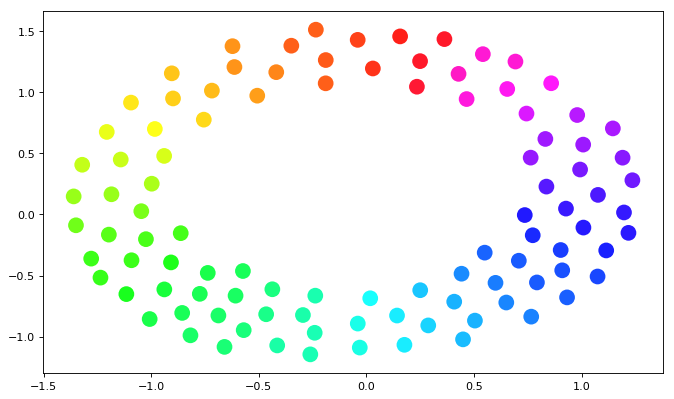

In [2]:
# Simulation parameters
a, dt, T, n, L  = 1, 0.5, 500, 100, 1   # surprisingly, dt = 0.5 seems to work OK (for prelimiart)
np.random.seed(0)
x0 = np.random.uniform(-L,L,n);y0=np.random.uniform(-L,L,n);theta0 = np.random.uniform(-np.pi,np.pi,n)
omega = np.zeros(n)
#J,K = 0.1, 1      #static sync state
#J,K = 0.1, -1     #static async state
J,K = 1.0, 0       #static phase wave 
#J,K = 1.0, -0.1,  #splintered phase wave --- note, long transient here
#J,K = 1.0, -0.75  #active phase wave 
z0 = [x0, y0, theta0]
t = [dt*i for i in range(int(T/dt))]


#Do simulation
tic = time.clock()
z0 = np.array([x0,y0,theta0])
z0 = z0.flatten()
sols = odeint(f.rhs_unit_vector, z0, t, args=(J,K,n,omega))
x, y, theta = f.unpack(sols,n)

# Collect auxiliary info, like the order parameter gamma, and S
r, phi = f.cart_to_polar(x,y)
gamma = f.find_gamma(phi)
v = f.find_vel_t(x,y,theta,dt)
transient_index = int(0.9*x.shape[0])
v_mean = np.mean([np.mean(v[t,:]) for t in range(transient_index,v.shape[0])])
S_plus = np.mean(np.abs(f.find_W_plus(x,y,theta))[transient_index:-1])
S_minus = np.mean(np.abs(f.find_W_minus(x,y,theta))[transient_index:-1])

#Plot at end
f.scatter_t(x,y,theta,-1)

Note: The runtime error "divide by zero" is OK, I account for it with the following line in rhs_unit_vector function

"np.fill_diagonal(inverse_dist_sq, 0.0)  ## correct 1 / d_ii = 0 / 1 error"

### Interactive 

Can't use this if you've not loaded the last three module (the interactive one) in my preamble.

In [3]:
def plot_temp(t):
    f.scatter_t(x,y,theta,t)
    
interact(plot_temp,t=(0,x.shape[0]-1,1))

NameError: name 'interact' is not defined

In [4]:
from IPython.html.widgets import interact, interactive

/Users/heiland/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
import notebook

In [7]:
from notebook import interact

ImportError: cannot import name 'interact'

In [8]:
from ipywidgets import interact, interactive

In [9]:
import IPython

In [10]:
IPython.version_info[0]

6

In [11]:
if (IPython.version_info[0] >= 4):
    print("yep, IPython > 4")

yep, IPython > 4
